## 분류와 회귀

### 영화 리뷰 분류 : 이진 분류 문제

#### IMDB 데이터셋 로드하기

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 2s 0us/step


#### 리뷰를 다시 텍스트로 디코딩하기

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

1654784/1641221 [==============================] - 0s 0us/step


#### 정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 모델 정의하기

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### 훈련 검증

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### 모델 훈련하기

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.5432 - accuracy: 0.7633 - val_loss: 0.4246 - val_accuracy: 0.8352
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3203 - accuracy: 0.8979 - val_loss: 0.3085 - val_accuracy: 0.8879
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2314 - accuracy: 0.9249 - val_loss: 0.2837 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1791 - accuracy: 0.9415 - val_loss: 0.2812 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1444 - accuracy: 0.9533 - val_loss: 0.2912 - val_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1186 - accuracy: 0.9640 - val_loss: 0.2932 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1001 - accuracy: 0.9702 - val_loss: 0.3340 - val_accuracy: 0.8817
Epoch 8/20
30

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 훈련과 검증 손실 그리기

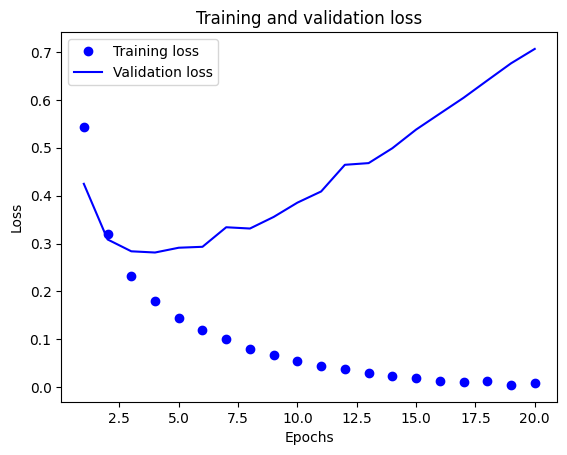

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### 훈련과 검증 정확도 그리기

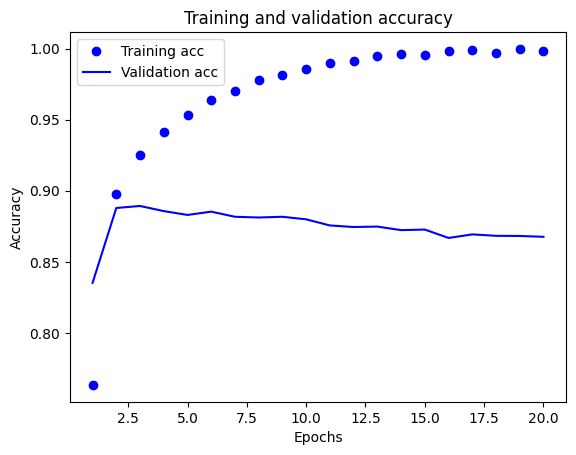

In [18]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 모델을 처음부터 다시 훈련하기

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4


2026-01-24 18:39:25.085579: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1000000000 exceeds 10% of free system memory.


49/49 [==============================] - 1s 8ms/step - loss: 0.4654 - accuracy: 0.8228
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2702 - accuracy: 0.9055
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2060 - accuracy: 0.9278
Epoch 4/4
 29/782 [>.............................] - ETA: 1s - loss: 0.2645 - accuracy: 0.8912  

2026-01-24 18:39:30.518463: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 1s 2ms/step - loss: 0.2926 - accuracy: 0.8840


In [20]:
results

[0.2925659120082855, 0.8839600086212158]

In [21]:
model.predict(x_test)

2026-01-24 18:39:48.021456: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1000000000 exceeds 10% of free system memory.


array([[0.17401046],
       [0.99995136],
       [0.7311212 ],
       ...,
       [0.12735328],
       [0.07131833],
       [0.570702  ]], dtype=float32)

### 뉴스 기사 분류 : 다중 분류 문제

#### 로이터 데이터셋 로드하기

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data), len(test_data)

(8982, 2246)

In [3]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

#### 로이터 데이터셋을 텍스트로 디코딩하기

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswire = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

565248/550378 [==============================] - 0s 0us/step


In [5]:
train_labels[10]

3

#### 데이터 인코딩하기

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### 레이블 인코딩하기

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

#### 모델 정의하기

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

2026-01-25 01:38:15.199749: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2026-01-25 01:38:15.199812: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2026-01-25 01:38:15.199891: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (BOOK-HU2G0S14U5): /proc/driver/nvidia/version does not exist
2026-01-25 01:38:15.205040: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
                metrics=['accuracy'])   

#### 검증 세트 준비

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#### 모델 훈련하기

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 41ms/step - loss: 2.6421 - accuracy: 0.4328 - val_loss: 1.7932 - val_accuracy: 0.6330
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.4734 - accuracy: 0.7005 - val_loss: 1.3046 - val_accuracy: 0.7280
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0660 - accuracy: 0.7783 - val_loss: 1.1085 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8272 - accuracy: 0.8295 - val_loss: 1.0028 - val_accuracy: 0.7890
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6547 - accuracy: 0.8642 - val_loss: 0.9465 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5248 - accuracy: 0.8920 - val_loss: 0.9218 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4221 - accuracy: 0.9116 - val_loss: 0.9640 - val_accuracy: 0.7820
Epoch 8/20
16

#### 훈련과 검증 손실 그리기

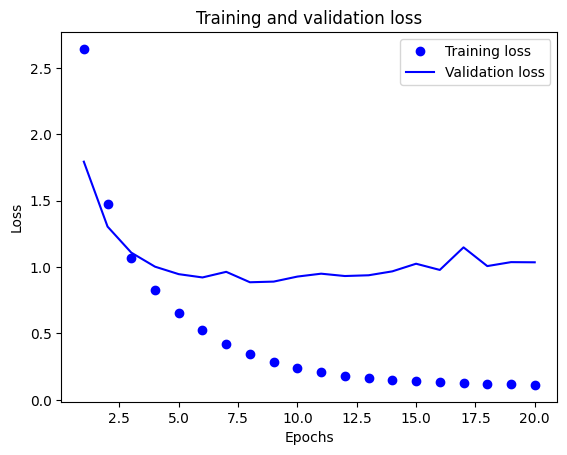

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### 훈련과 검증 정확도 그리기

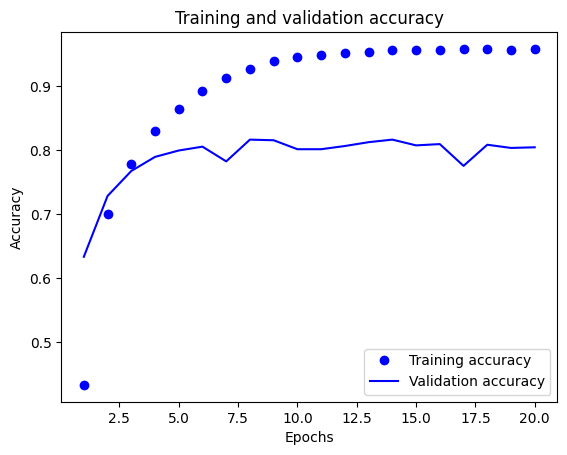

In [16]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 모델을 처음부터 다시 훈련하기

In [17]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
                metrics=['accuracy'])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.5812 - accuracy: 0.5155
Epoch 2/9
18/18 [==============================] - 0s 11ms/step - loss: 1.3850 - accuracy: 0.7126
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 1.0248 - accuracy: 0.7856
Epoch 4/9
18/18 [==============================] - 0s 11ms/step - loss: 0.8003 - accuracy: 0.8346
Epoch 5/9
18/18 [==============================] - 0s 11ms/step - loss: 0.6361 - accuracy: 0.8706
Epoch 6/9
18/18 [==============================] - 0s 11ms/step - loss: 0.5104 - accuracy: 0.8947
Epoch 7/9
18/18 [==============================] - 0s 11ms/step - loss: 0.4147 - accuracy: 0.9139
Epoch 8/9
18/18 [==============================] - 0s 11ms/step - loss: 0.3392 - accuracy: 0.9281
Epoch 9/9
71/71 [==============================] - 0s 1ms/step - loss: 0.9459 - accuracy: 0.7961


In [18]:
results

[0.945918619632721, 0.7960819005966187]

#### 랜덤한 분류기

In [19]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19323241317898487

#### 정보 병목이 있는 모델

In [20]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 3.6858 - accuracy: 0.0588 - val_loss: 3.5092 - val_accuracy: 0.1420
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 3.3273 - accuracy: 0.3274 - val_loss: 3.2303 - val_accuracy: 0.5640
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 3.0329 - accuracy: 0.5658 - val_loss: 3.0242 - val_accuracy: 0.5760
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 2.8187 - accuracy: 0.5792 - val_loss: 2.8986 - val_accuracy: 0.5710
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 2.6626 - accuracy: 0.5902 - val_loss: 2.7983 - val_accuracy: 0.5750
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 2.5408 - accuracy: 0.6010 - val_loss: 2.7190 - val_accuracy: 0.5930
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 2.4391 - accuracy: 0.6119 - val_loss: 2.6549 - val_accuracy: 0.5910
Epoch 8/20
16

## Notes

##### 신경망 모델

- Dense 층을 쌓을 때에는 얼마나 많은 층을 사용할 지와 각 층에 얼마나 많은 유닛을 둘 것인가를 결정해야 한다.

- 활성화 함수를 추가함으로써 선형 변환 이외의 가설 공간을 풍부하게 만들어 층을 깊게 만들 수 있다.

##### 전처리, 인코딩, 성능

- 원본 데이터를 신경망에 텐서로 주입하기 위해서는 꽤 많은 전처리가 필요하다. 단어 시퀀스는 이진 벡터로 인코디오딜 수 있지만 다른 인코딩 방식도 있다.

- relu 활성화 함수와 함께 Dense 층을 쌓은 모델은 여러 종류의 문제에 적용할 수 있어 앞으로 자주 사용하게 된다.

- 이진 분류 모델에서 모델은 하나의 유닛과 sigmoid 활성화 함수를 가진 Dense 층으로 끝나야 한다. 이 모델의 출력은 0과 1 사이의 스칼라 값이다.

- 훈련 데이터에 대해 성능이 향상됨에 따라 신경망은 과대적합되기 시작하고 이 전에 본적 없는 데이터에서는 결과가 점점 나빠지게 된다.